### Performing the same Data preprocessing for the random forest model as well

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Loading the dataset with correct divider

In [134]:
df = pd.read_csv('./Dataset/bank-full.csv', delimiter=';')
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### Checking for missing values

In [135]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#### Checking for duplicate values

In [136]:
print(df.duplicated().sum())  # Count the number of duplicate rows

0


#### Identify the datatypes

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [138]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Getting the numerical values

In [139]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


#### Getting the Categorical values

In [140]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


#### Checking for the Boolean values

In [141]:
boolean_columns = df.select_dtypes(include=['bool']).columns
print("Boolean Columns:", boolean_columns)

Boolean Columns: Index([], dtype='object')


#### Indentifying the unique values for each columns one by one

In [142]:
df['job'].unique()
df['marital'].unique()
df['education'].unique()
df['default'].unique()
df['housing'].unique()
df['contact'].unique()
df['month'].unique()
df['poutcome'].unique()
df['y'].unique()
df['campaign'].unique()


array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

##### To determine if the feature is important, chi2_contingency test is used to evaluate independence of the two categorical variables.

In [143]:
from scipy.stats import chi2_contingency

# If p value is < 0.05, the feature is influencing the targeted variable

crosstab = pd.crosstab(df['contact'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 1035.714225356292
p-value: 1.251738325340638e-225


##### As we can see the p value is extremely small. that means this feature extremely influences the targeted variable


##### One hot encoding the column

In [144]:
# Apply One-Hot Encoding to the 'contact' column
df_encoded = pd.get_dummies(df['contact'], prefix='contact')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'contact' column
df.drop('contact', axis=1, inplace=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y,contact_cellular,contact_telephone,contact_unknown
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no,0,0,1
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no,0,0,1
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no,0,0,1


#### Analysing poutcome feature

In [145]:
crosstab = pd.crosstab(df['poutcome'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 4391.5065887686615
p-value: 0.0


##### as the values have a relationship like success, fail and all. label encoding is a better option

In [146]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'poutcome' column
df['poutcome_encoded'] = label_encoder.fit_transform(df['poutcome'])

df.drop('poutcome', axis=1, inplace=True)

# Display the resulting DataFrame
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day month  duration  campaign  pdays  previo

#### Encoding the Y variable and Checking the correlation between the numerical features

In [147]:
from scipy.stats import pointbiserialr

# Step 1: Convert 'y' to numeric (binary)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Step 2: Define numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Step 3: Calculate Point-Biserial Correlation for each feature
correlation_results = []
for col in numerical_features:
    corr, p_value = pointbiserialr(df[col], df['y'])
    correlation_results.append((col, corr, p_value))

# Step 4: Print results
print("Feature-wise Point-Biserial Correlation and p-values:")
for feature, corr, p_value in correlation_results:
    print(f"Feature: {feature}, Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Feature-wise Point-Biserial Correlation and p-values:
Feature: age, Correlation: 0.025, p-value: 0.000
Feature: balance, Correlation: 0.053, p-value: 0.000
Feature: day, Correlation: -0.028, p-value: 0.000
Feature: duration, Correlation: 0.395, p-value: 0.000
Feature: campaign, Correlation: -0.073, p-value: 0.000
Feature: pdays, Correlation: 0.104, p-value: 0.000
Feature: previous, Correlation: 0.093, p-value: 0.000


#### Plotting the correlation in a heatmap for better visualization

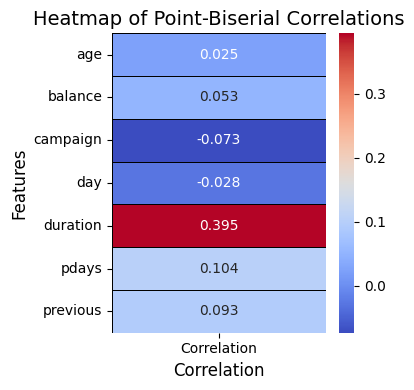

In [148]:
import seaborn as sns

# Convert correlation results to a DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Correlation', 'p_value'])

# Create a pivot for heatmap visualization (correlation coefficients)
heatmap_data = correlation_df.pivot_table(values='Correlation', index=['Feature'])

# Plot heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, fmt='.3f', linewidths=0.6, linecolor='black')
plt.title('Heatmap of Point-Biserial Correlations', fontsize=14)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()

# Display the heatmap
plt.show()


##### By analysing the correlation, we can see that day feature does a very less impact in the prediction. So removing it will be a better option. Same as that the month column has similar characteristic. considering that it can be removed

#### Analysing the campaign 

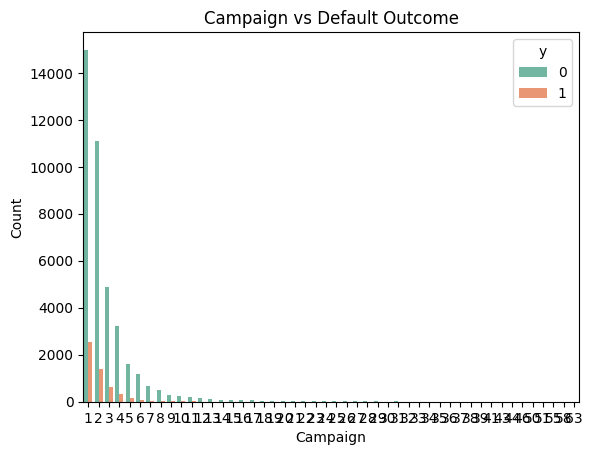

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the 'campaign' variable (discrete) and binary target 'y'
sns.countplot(x='campaign', hue='y', data=df, palette='Set2')

plt.title('Campaign vs Default Outcome')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.show()


In [150]:
import pandas as pd

campaign_counts = df.groupby('campaign')['y'].value_counts().unstack(fill_value=0)

# Display the result
print(campaign_counts)

y             0     1
campaign             
1         14983  2561
2         11104  1401
3          4903   618
4          3205   317
5          1625   139
6          1199    92
7           688    47
8           508    32
9           306    21
10          252    14
11          185    16
12          151     4
13          127     6
14           89     4
15           80     4
16           77     2
17           63     6
18           51     0
19           44     0
20           42     1
21           34     1
22           23     0
23           22     0
24           19     1
25           22     0
26           13     0
27           10     0
28           16     0
29           15     1
30            8     0
31           12     0
32            8     1
33            6     0
34            5     0
35            4     0
36            4     0
37            2     0
38            3     0
39            1     0
41            2     0
43            3     0
44            1     0
46            1     0
50        

##### Dropping the unneeded columns

In [151]:
df = df.drop(columns=['day', 'month'])

#### Check for outliers using box plot for numerical  values


<Axes: xlabel='y', ylabel='duration'>

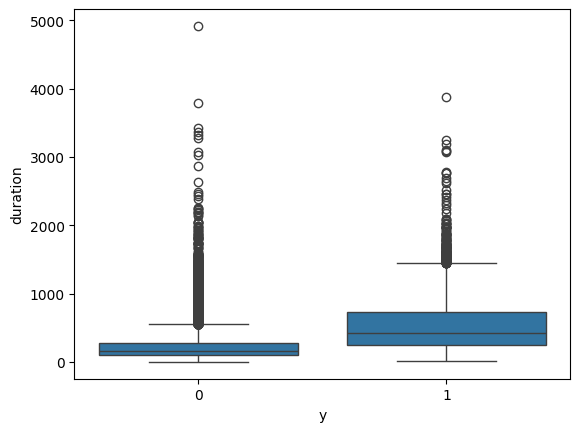

In [152]:
sns.boxplot(x='y', y='duration', data=df)

##### As we can see there's no negative values here. so we can use it as it is.

<Axes: xlabel='y', ylabel='age'>

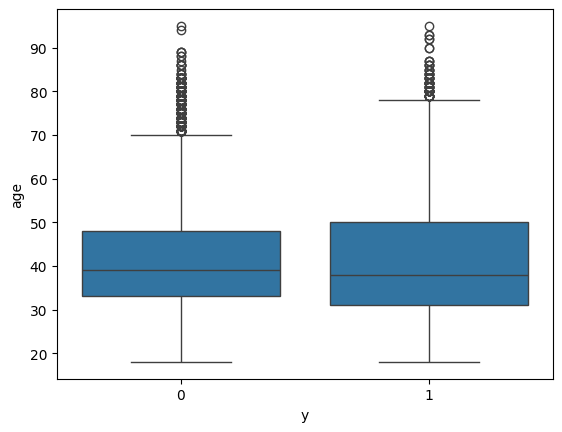

In [153]:
sns.boxplot(x='y', y='age', data=df)

##### There are some extreme values. though those are accpetable. so it can be used directly

<Axes: xlabel='y', ylabel='balance'>

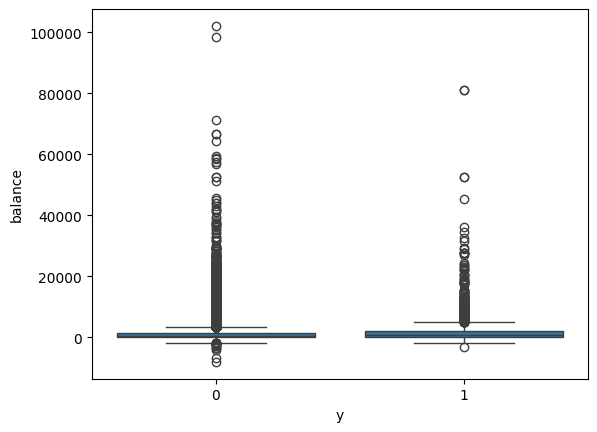

In [154]:
sns.boxplot(x='y', y='balance', data=df)

##### there are negative values as well as extreme values. in this case both can  be accepted. extreme values can be there on some circumstances. for negative values, it can be considered as credits. so can be applied directly

<Axes: xlabel='y', ylabel='previous'>

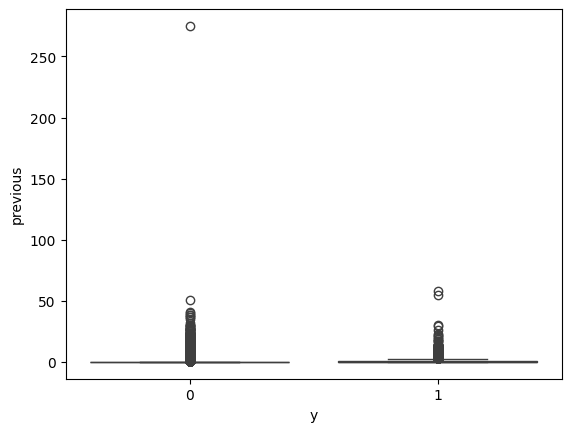

In [155]:
sns.boxplot(x='y', y='previous', data=df)

##### Removing that one outlier

In [156]:
# Identify the record with the extreme value in 'previous'
outlier_row = df[df['previous'] > 250]

# Display the details of the record
print("Outlier row details:")
print(outlier_row)

# Drop the specific row
df = df.drop(outlier_row.index)

# Verify the row is removed
print(f"Updated dataset shape: {df.shape}")

Outlier row details:
       age         job  marital education default  balance housing loan  \
29182   40  management  married  tertiary      no      543     yes   no   

       duration  campaign  pdays  previous  y  contact_cellular  \
29182       349         2    262       275  0                 1   

       contact_telephone  contact_unknown  poutcome_encoded  
29182                  0                0                 1  
Updated dataset shape: (45210, 17)


In [157]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y,contact_cellular,contact_telephone,contact_unknown,poutcome_encoded
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,0,0,0,1,3
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,0,0,0,1,3
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,0,0,0,1,3
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,0,0,0,1,3
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,0,0,0,1,3


##### Label endcoding is used for the categorical features below. these features are important and also it has only two values. to reduce dimension label encoding is used here

#### Analysing Pdays

<Axes: xlabel='y', ylabel='pdays'>

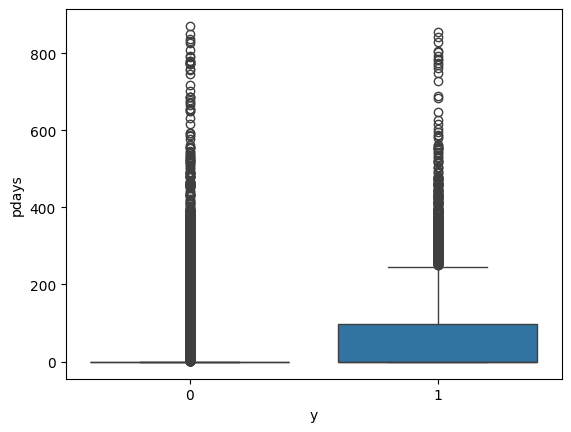

In [158]:
sns.boxplot( x='y', y= 'pdays', data=df )

#### Scaling the pdays to consider the -1 value

In [159]:
from sklearn.preprocessing import StandardScaler

# Create buckets or categories for 'pdays'
df['pdays_category'] = pd.cut(
    df['pdays'],
    bins=[-2, 0, 100, 300, 900],
    labels=['Not Contacted', 'Recently Contacted', 'Contacted Long Ago', 'Very Long Ago']
)

# One-hot encode the categories 
df = pd.get_dummies(df, columns=['pdays_category'], prefix='pdays_cat')

# Ensure all boolean-like columns are integers
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})

# Display the transformed dataset
print(df)


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       duration  campaign  ...  previous  y  contac

##### A simple heatmap is plotted to understand the importance of the below housing, loan and default features

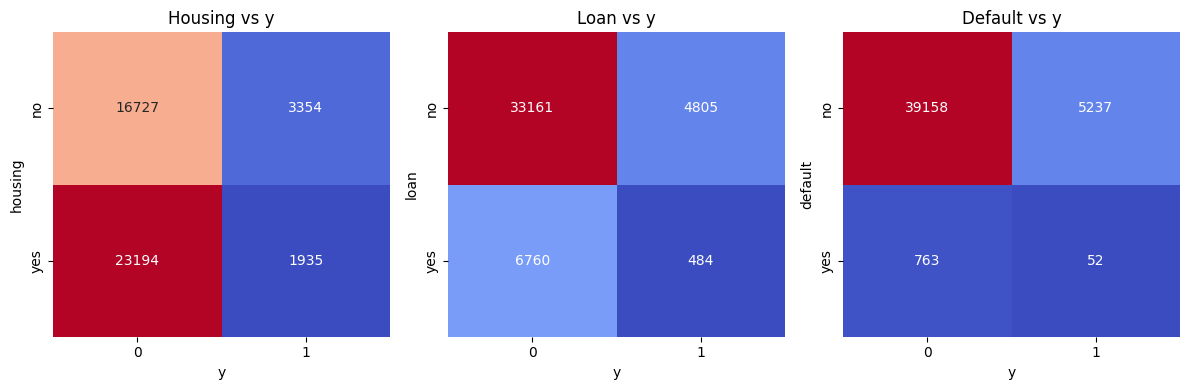

In [160]:
# Create cross-tabulation for each feature with 'y'
cross_tab_housing = pd.crosstab(df['housing'], df['y'])
cross_tab_loan = pd.crosstab(df['loan'], df['y'])
cross_tab_default = pd.crosstab(df['default'], df['y'])

# Plot heatmaps
plt.figure(figsize=(12, 4))

# Heatmap for housing feature
plt.subplot(1, 3, 1)
sns.heatmap(cross_tab_housing, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Housing vs y')

# Heatmap for loan feature
plt.subplot(1, 3, 2)
sns.heatmap(cross_tab_loan, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Loan vs y')

# Heatmap for default feature
plt.subplot(1, 3, 3)
sns.heatmap(cross_tab_default, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Default vs y')

plt.tight_layout()
plt.show()


In [161]:
# List of columns to apply Label Encoding to (yes/no columns)
yes_no_columns = ['default', 'housing', 'loan']

# Apply Label Encoding to each of the columns in the list
df[yes_no_columns] = df[yes_no_columns].replace({'yes': 1, 'no': 0})

df.head()

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_12240\3595634537.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace({'yes': 1, 'no': 0})


,age,job,marital,education,default,balance,housing,loan,duration,campaign,...,previous,y,contact_cellular,contact_telephone,contact_unknown,poutcome_encoded,pdays_cat_Not Contacted,pdays_cat_Recently Contacted,pdays_cat_Contacted Long Ago,pdays_cat_Very Long Ago
0,58,management,married,tertiary,0,2143,1,0,261,1,...,0,0,0,0,1,3,1,0,0,0
1,44,technician,single,secondary,0,29,1,0,151,1,...,0,0,0,0,1,3,1,0,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,76,1,...,0,0,0,0,1,3,1,0,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,...,0,0,0,0,1,3,1,0,0,0
4,33,unknown,single,unknown,0,1,0,0,198,1,...,0,0,0,0,1,3,1,0,0,0


##### Doing Label encoding for education. it has a perfect relationship between each unique values. Also it will reduce the dimensionality of the dataset

In [162]:
# Label Encoding
education_mapping = {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}

df['education_encoded'] = df['education'].map(education_mapping)
df = df.drop(columns=['education'])
df.head()

,age,job,marital,default,balance,housing,loan,duration,campaign,pdays,...,y,contact_cellular,contact_telephone,contact_unknown,poutcome_encoded,pdays_cat_Not Contacted,pdays_cat_Recently Contacted,pdays_cat_Contacted Long Ago,pdays_cat_Very Long Ago,education_encoded
0,58,management,married,0,2143,1,0,261,1,-1,...,0,0,0,1,3,1,0,0,0,2
1,44,technician,single,0,29,1,0,151,1,-1,...,0,0,0,1,3,1,0,0,0,1
2,33,entrepreneur,married,0,2,1,1,76,1,-1,...,0,0,0,1,3,1,0,0,0,1
3,47,blue-collar,married,0,1506,1,0,92,1,-1,...,0,0,0,1,3,1,0,0,0,3
4,33,unknown,single,0,1,0,0,198,1,-1,...,0,0,0,1,3,1,0,0,0,3


#### Encoding for job feature

In [163]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

<Figure size 1000x600 with 0 Axes>

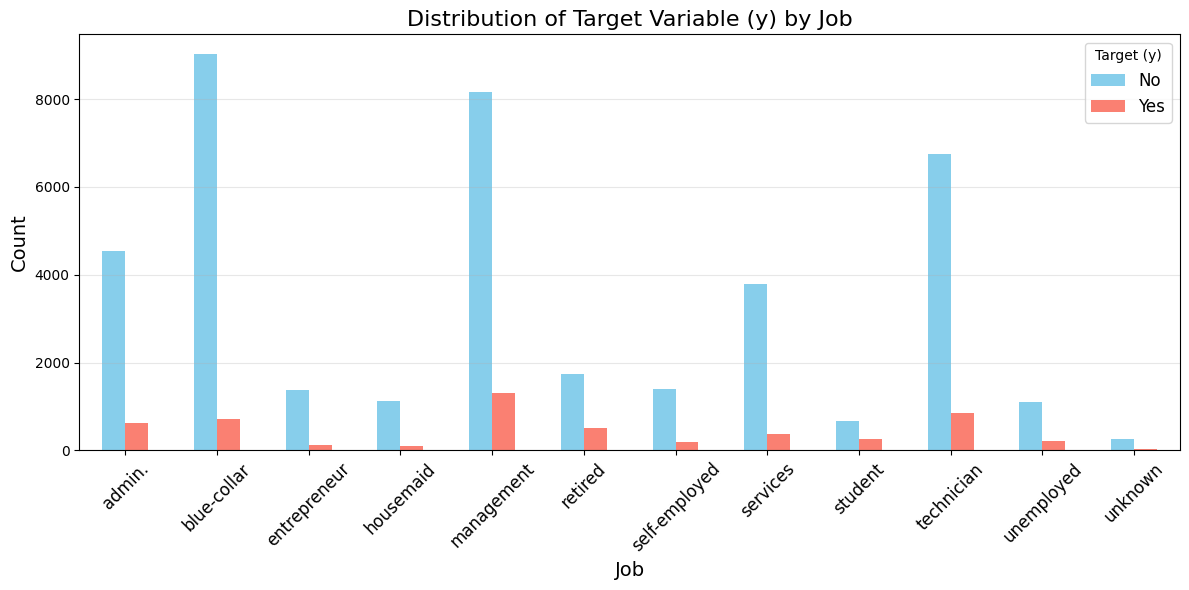

In [164]:
# Grouped bar plot for job and y
plt.figure(figsize=(10, 6))

# Create a crosstab of job vs y
job_y_crosstab = pd.crosstab(df['job'], df['y'])

# Plot the grouped bar chart
job_y_crosstab.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])

plt.title("Distribution of Target Variable (y) by Job", fontsize=16)
plt.xlabel("Job", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(["No", "Yes"], title="Target (y)", fontsize=12)
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()


##### This feature plays a crucial role on the trget variable. the perfect approach to this feature is one hot encoding which will treat each category independently

In [165]:
# Apply One-Hot Encoding to the 'job' column
df_encoded = pd.get_dummies(df['job'], prefix='job')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'job' column (optional)
df.drop('job', axis=1, inplace=True)

df.head()

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,0,2143,1,0,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,single,0,29,1,0,151,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,married,0,2,1,1,76,1,-1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,married,0,1506,1,0,92,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,single,0,1,0,0,198,1,-1,0,...,0,0,0,0,0,0,0,0,0,1


#### marital will also play a huge role on prediction. so treating them indpendently will be a boost in the model. so one hot encoding is more suitable here

In [166]:
from scipy.stats import chi2_contingency

# If p value is < 0.05, the feature is influencing the targeted variable

crosstab = pd.crosstab(df['marital'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 196.45890449554065
p-value: 2.185198674532852e-43


In [167]:
# Apply One-Hot Encoding to the 'marital' column
df_encoded = pd.get_dummies(df['marital'], prefix='marital')

# Convert boolean columns to integers (1 for True, 0 for False)
df_encoded = df_encoded.astype(int)

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'marital' column
df.drop('marital', axis=1, inplace=True)

# Display the resulting DataFrame
print(df)

       age  default  balance  housing  loan  duration  campaign  pdays  \
0       58        0     2143        1     0       261         1     -1   
1       44        0       29        1     0       151         1     -1   
2       33        0        2        1     1        76         1     -1   
3       47        0     1506        1     0        92         1     -1   
4       33        0        1        0     0       198         1     -1   
...    ...      ...      ...      ...   ...       ...       ...    ...   
45206   51        0      825        0     0       977         3     -1   
45207   71        0     1729        0     0       456         2     -1   
45208   72        0     5715        0     0      1127         5    184   
45209   57        0      668        0     0       508         4     -1   
45210   37        0     2971        0     0       361         2    188   

       previous  y  ...  job_retired  job_self-employed  job_services  \
0             0  0  ...            0  

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           45210 non-null  int64
 1   default                       45210 non-null  int64
 2   balance                       45210 non-null  int64
 3   housing                       45210 non-null  int64
 4   loan                          45210 non-null  int64
 5   duration                      45210 non-null  int64
 6   campaign                      45210 non-null  int64
 7   pdays                         45210 non-null  int64
 8   previous                      45210 non-null  int64
 9   y                             45210 non-null  int64
 10  contact_cellular              45210 non-null  int32
 11  contact_telephone             45210 non-null  int32
 12  contact_unknown               45210 non-null  int32
 13  poutcome_encoded              45210 

#### Finally we train the random forest model with our preprocessed data

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features (all columns except 'y')
X = df.drop('y', axis=1)

# Target variable
y = df['y']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

#### Model evaluation

In [170]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Scores: {cv_scores}")

print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

Random Forest Model Accuracy: 89.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7949
           1       0.62      0.37      0.46      1093

    accuracy                           0.90      9042
   macro avg       0.77      0.67      0.70      9042
weighted avg       0.88      0.90      0.88      9042


Confusion Matrix:
[[7697  252]
 [ 687  406]]

Cross-Validation Scores: [0.89062154 0.88321168 0.87115682 0.86540588 0.72063703]
Mean Cross-Validation Accuracy: 84.62%


#### Hyper parameter tuning

In [181]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("Class Distribution after SMOTE:")
unique, counts = np.unique(y_train_smote, return_counts=True)
print(dict(zip(unique, counts)))

# Define the parameter distribution for random sampling
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=30,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',  # Scoring metric
    random_state=42,
    n_jobs=-1    # Use all available CPU cores
)

# Fit RandomizedSearchCV on the SMOTE-augmented training data
random_search.fit(X_train_smote, y_train_smote)

# Get the best model
best_rf_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)

# Metrics and evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Class Distribution after SMOTE:
{0: 31972, 1: 31972}
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'class_weight': 'balanced_subsample'}
Model Accuracy: 89.44%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7949
           1       0.58      0.48      0.52      1093

    accuracy                           0.89      9042
   macro avg       0.75      0.71      0.73      9042
weighted avg       0.89      0.89      0.89      9042


Confusion Matrix:
[[7565  384]
 [ 571  522]]


In [182]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the best model
cv_scores = cross_val_score(
    best_rf_model,    # Best model selected by RandomizedSearchCV
    X_train_smote,    # The SMOTE-augmented training data
    y_train_smote,    # The target labels
    cv=5,             # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the scoring metric
    n_jobs=-1         # Use all available CPU cores
)

# Print the cross-validation scores
print("Cross-validation scores for the best model:")
print(cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print(f"\nMean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")


Cross-validation scores for the best model:
[0.73961999 0.9659082  0.96285871 0.96872312 0.96731311]

Mean Accuracy: 92.09%
Standard Deviation: 9.07%


In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Function to manually adjust hyperparameters and evaluate the model
def evaluate_rf_model(X_train, y_train, X_test, y_test, params):
    # Create the Random Forest model with the given parameters
    rf_model = RandomForestClassifier(**params, random_state=42)
    
    # Fit the model to the training data
    rf_model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = rf_model.predict(X_test)
    
    # Compute accuracy, classification report, and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%\n")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Adjust parameters 
manual_params = {
    "n_estimators": 200,
    "max_depth": 25,
    "min_samples_split": 5,
    "min_samples_leaf": 2,
    "class_weight": "balanced"
}

# Call the function with the parameters to evaluate
evaluate_rf_model(X_train, y_train, X_test, y_test, manual_params)


Random Forest Model Accuracy: 88.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7949
           1       0.54      0.65      0.59      1093

    accuracy                           0.89      9042
   macro avg       0.74      0.78      0.76      9042
weighted avg       0.90      0.89      0.89      9042

Confusion Matrix:
[[7336  613]
 [ 386  707]]


In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation
print("Performing 5-Fold Cross-Validation...")
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Display results
print("Cross-Validation Scores (Per Fold):")
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: Accuracy = {score * 100:.2f}%")

# Calculate and display the mean and standard deviation of cross-validation accuracy
mean_accuracy = np.mean(cv_scores) * 100
std_accuracy = np.std(cv_scores) * 100
print(f"\nMean Cross-Validation Accuracy: {mean_accuracy:.2f}%")
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}%")


Performing 5-Fold Cross-Validation...
Cross-Validation Scores (Per Fold):
Fold 1: Accuracy = 88.62%
Fold 2: Accuracy = 88.78%
Fold 3: Accuracy = 87.88%
Fold 4: Accuracy = 88.75%
Fold 5: Accuracy = 88.73%

Mean Cross-Validation Accuracy: 88.55%
Standard Deviation of Accuracy: 0.34%


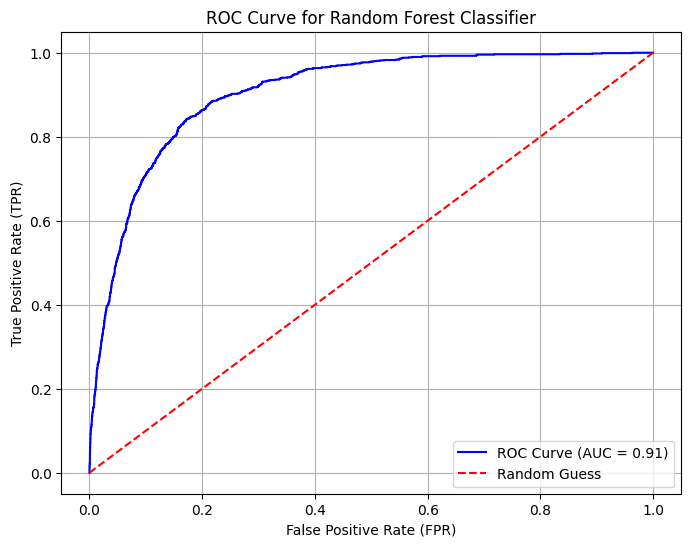

In [179]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Fit the model and get predictions with probabilities
rf_model = RandomForestClassifier(**manual_params, random_state=42)
rf_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()
